In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def perturb_data(data, epsilon, mu=0):
    """
    Applies the Laplace mechanism to provide differential privacy.

    Parameters:
    data (pd.Series, np.ndarray, list): The original data to be perturbed.
    epsilon (float): The privacy budget parameter. Must be greater than 0.
    mu (float, optional): The mean used in the Laplace distribution. Default is 0.

    Returns:
    pd.Series: The perturbed data with Laplace noise added.
    """
    if epsilon <= 0:
        raise ValueError("Epsilon must be greater than 0 for differential privacy.")

    if not isinstance(data, pd.Series):
        data = pd.Series(data)

    b = 1 / epsilon
    laplace_noise = np.random.laplace(mu, b, data.size)
    perturbed_data = data + laplace_noise.round().astype(int)

    return perturbed_data


def visualize_perturbation(raw_data, perturbed_data, title, xlabel, ylabel, density=True):
    plt.figure(figsize=(10, 6))
    data = raw_data - perturbed_data
    plt.hist(data, bins=50, alpha=0.8, density=density)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

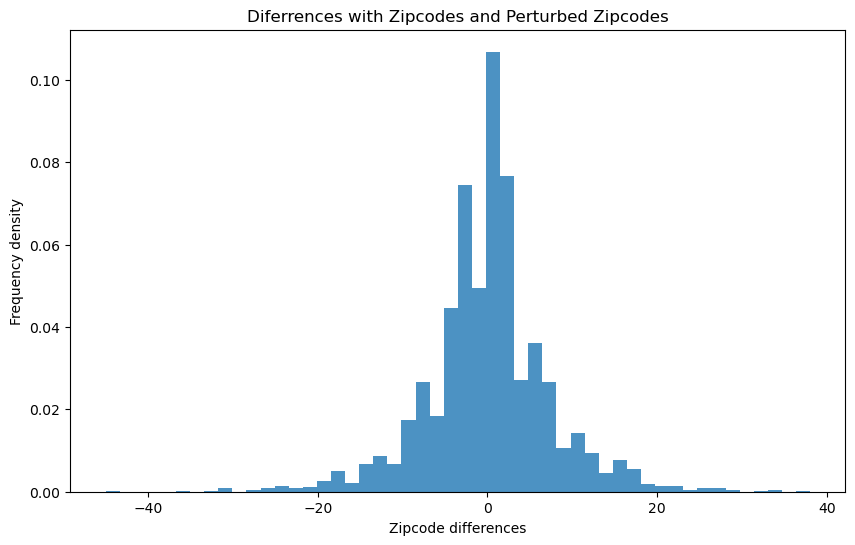

In [8]:
raw_data = pd.read_csv("../datasets/credit_card_fraud_train_dataset.csv")
zipcodes = raw_data["zip"]
epsilon = 0.2
perturbed_zipcodes = perturb_data(zipcodes, epsilon)
#differences = zipcodes - perturbed_zipcodes
visualize_perturbation(zipcodes, perturbed_zipcodes, 'Diferrences with Zipcodes and Perturbed Zipcodes', 'Zipcode differences', 'Frequency density' )